Generating sample dataset, 
Preparing data (reshaping), 
Building a model with SimpleRNN, 
Predicting and plotting results


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [16]:
N = 1000    
Tp = 800    

t=np.arange(0,N)
x=np.sin(0.02*t)+2*np.random.rand(N)
df = pd.DataFrame(x)
df.head()

,0
0,0.687080
1,1.359515
2,1.580498
3,1.504288
4,1.725173


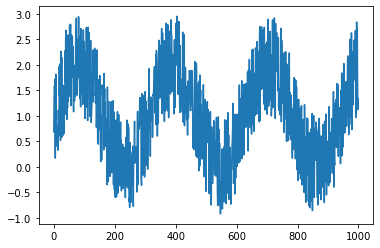

In [17]:
plt.plot(df)
plt.show()

In [18]:
# split 'df' dataset into a training and test parts.

values=df.values
train,test = values[0:Tp,:], values[Tp:N,:]

Preparing data (reshaping)

RNN model requires a step value that contains n number of elements as an input sequence.

In [19]:
step = 4

In [20]:
# add step elements into train and test
test = np.append(test,np.repeat(test[-1,],step))
train = np.append(train,np.repeat(train[-1,],step))

In [21]:
# Convert test and train data into the matrix with step value
# convert into dataset matrix
def convertToMatrix(data, step):
 X, Y =[], []
 for i in range(len(data)-step):
  d=i+step  
  X.append(data[i:d,])
  Y.append(data[d,])
 return np.array(X), np.array(Y)

trainX,trainY =convertToMatrix(train,step)
testX,testY =convertToMatrix(test,step)

In [22]:
#reshape trainX and testX to fit with the Keras model. RNN model requires three-dimensional input data.
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
trainX.shape

(800, 1, 4)

# Building a model with SimpleRNN

In [23]:
# SimpleRNN model
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(1,step), activation="relu"))
model.add(Dense(8, activation="relu")) 
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 32)                1184      
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 1,457
Trainable params: 1,457
Non-trainable params: 0
_________________________________________________________________


# Predicting and plotting the result


In [24]:
#fit model with trainX data and predict testX data.
model.fit(trainX,trainY, epochs=100, batch_size=16, verbose=2)
trainPredict = model.predict(trainX)
testPredict= model.predict(testX)
predicted=np.concatenate((trainPredict,testPredict),axis=0)

Epoch 1/100
50/50 - 0s - loss: 1.7125
Epoch 2/100
50/50 - 0s - loss: 0.5141
Epoch 3/100
50/50 - 0s - loss: 0.4039
Epoch 4/100
50/50 - 0s - loss: 0.3955
Epoch 5/100
50/50 - 0s - loss: 0.3920
Epoch 6/100
50/50 - 0s - loss: 0.3874
Epoch 7/100
50/50 - 0s - loss: 0.3863
Epoch 8/100
50/50 - 0s - loss: 0.3853
Epoch 9/100
50/50 - 0s - loss: 0.3842
Epoch 10/100
50/50 - 0s - loss: 0.3837
Epoch 11/100
50/50 - 0s - loss: 0.3853
Epoch 12/100
50/50 - 0s - loss: 0.3812
Epoch 13/100
50/50 - 0s - loss: 0.3824
Epoch 14/100
50/50 - 0s - loss: 0.3801
Epoch 15/100
50/50 - 0s - loss: 0.3811
Epoch 16/100
50/50 - 0s - loss: 0.3805
Epoch 17/100
50/50 - 0s - loss: 0.3801
Epoch 18/100
50/50 - 0s - loss: 0.3782
Epoch 19/100
50/50 - 0s - loss: 0.3798
Epoch 20/100
50/50 - 0s - loss: 0.3796
Epoch 21/100
50/50 - 0s - loss: 0.3805
Epoch 22/100
50/50 - 0s - loss: 0.3798
Epoch 23/100
50/50 - 0s - loss: 0.3801
Epoch 24/100
50/50 - 0s - loss: 0.3765
Epoch 25/100
50/50 - 0s - loss: 0.3789
Epoch 26/100
50/50 - 0s - loss: 0.

In [25]:
#check the loss
trainScore = model.evaluate(trainX, trainY, verbose=0)
print(trainScore)

0.35353031754493713


KeyError: (slice(None, None, None), None)

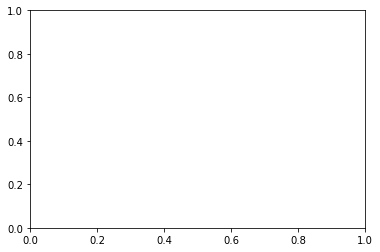

In [33]:
index = df.index.values
plt.plot(index,df)
plt.plot(index,predicted)
plt.axvline(df.index[Tp], c="r")
plt.show()